In [510]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import random
from scipy import stats

#tests
from scipy.stats import ks_2samp, chi2_contingency
import pandas as pd
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro




random.seed(10)

In [411]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np



from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Task 1

Введение: Микросателлит (микросателлитный регион) - регион генома, в котором одна короткая (от 1 до 5 букв) последовательность букв повторяется много раз (от 15 до 35). Микросателлитная нестабильность - часто наблюдаемое явление в опухолевых клетках, являющееся следствием нарушения системы восстановления нарушений ДНК. При этом нарушении ДНК-полимераза при копировании генома ‘проскальзывает’ на микросателлитах, что приводит к уменьшению их длины в геноме клетки. Например, рассмотрим микросателлитный регион A, представляющий собой повтор 19 букв T подряд. В опухоли без микросателлитной во всех клетках длина региона А будет ровно 19 букв (с маловероятными небольшими отклонения). В опухоли с микросателлитной нестабильностью образуется субпопуляция клеток, в которых регион А имеет вариабельную длину - в каких-то клетках он будет длиной 15 букв, где-то длиной 18 букв, где-то 19 букв (за счет того, что проскальзывание ДНК-полимеразы на микросателлитах -стохастический процесс - где-то проскользнет больше, где-то не проскользнет вообще). Если мы проведем секвенирование региона А опухоли без микросателлитной нестабильности и получим N чтений, покрывающих сайт A, то большинство из этих чтений будут содержать последовательность 19 букв T подряд. При этом будут также встречаться и последовательности 18 букв Т подряд и 20 - это является следствием ошибок секвенирования. Если мы проведем секвенирование региона А опухоли с микросателлитной нестабильностью, то наблюдаемое разнообразие длин повтора в прочтениях будет значительно шире.

При том, в опухоли с микросателлитной нестабильностью, какие микросателлиты могут иметь вариабельную длину (являются нестабильными), какие-то могут сохранять узкий спектр длины повтора (являются стабильными) - это также обусловлено стохастичностью процесса проскальзывания ДНК-полимеразы.
Важная дополнительная информация: микросателлит А может также иметь разную длину у разных людей (то есть, в популяции у него вариабельная длина) - у одного человека с рождения в повторе может быть 19 букв Т, у другого - 17, у третьего - на половине хромосом 17 букв, на другой половине 19 букв (за счет того, что, например, от мамы пришло 19 букв, от папы 17 букв).

Условия: было проведено секвенирование 12 образцов опухоли с микросателлитной нестабильностью (образцы MSI-1, MSI-2 и так далее) и 16 образцов опухоли без микросателлитной нестабильности (образцы MSS-1, MSS-2 и так далее). В ходе эксперимента были получены прочтения 33 микросателлитных регионов (регионы STR1, STR2, …, STR33). В ходе предварительной обработки данных для каждого образца был получен спектр наблюдаемых длин каждого повтора. Для каждого повтора в каждом образце получено 20 точек для каждого микросателлитного региона - доля прочтений, содержащих конкретную длину повтора. Результаты сведены в таблицу. По столбцам расположены различные образцы. По строкам - различные длины различных повторов. В ячейках - доля прочтений у конкретного образца, которые содержат конкретную длину конкретного повтора. Например, в данных секвенирования образца MSI-12, повтор STR1 имеет длину 14 букв в 7% прочтений, он же имеет длину 19 букв в 36% прочтений того же образца.

In [6]:
os.getcwd()

'D:\\Files from MSI 2020\\OncoAtlas'

### Data exploration

In [16]:
task1 = pd.read_csv('MSI_main.tsv', sep='\t', header= 0)

In [221]:
task1

,Образцы ->,MSI-1,MSI-2,MSI-3,MSI-4,MSI-5,MSI-6,MSI-7,MSI-8,MSI-9,...,MSS-7,MSS-8,MSS-9,MSS-10,MSS-11,MSS-12,MSS-13,MSS-14,MSS-15,MSS-16
0,NaN,STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9(A),0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10(A),0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11(A),0.0004086451144,0.000000,0.000000,0.0,0.0,0.000151,0.000000,0.000133,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12(A),0.00367780603,0.000312,0.000439,0.0,0.0,0.000378,0.000253,0.003323,0.000464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,21(A),0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
689,22(A),0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,23(A),0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691,24(A),0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
#Check data

for index, row in task1.iterrows():
    for column, value in row.items():
        if isinstance(value, str) and value[0].isalpha():
            print(index, value)
#             print("Value at ({}, {}): {}".format(index, column, value))

# 33 microsattelite regions

0 STR1
21 STR2
42 STR3
63 STR4
84 STR5
105 STR6
126 STR7
147 STR8
168 STR9
189 STR10
210 STR11
231 STR12
252 STR13
273 STR14
294 STR15
315 STR16
336 STR17
357 STR18
378 STR19
399 STR20
420 STR21
441 STR22
462 STR23
483 STR24
504 STR25
525 STR26
546 STR27
567 STR28
588 STR29
609 STR30
630 STR31
651 STR32
672 STR33


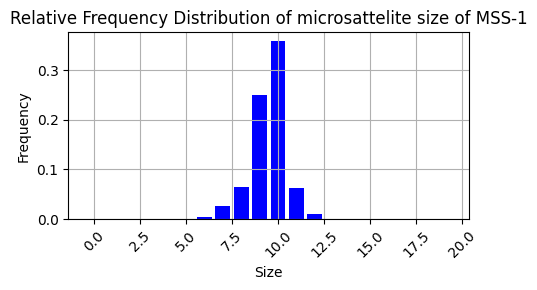

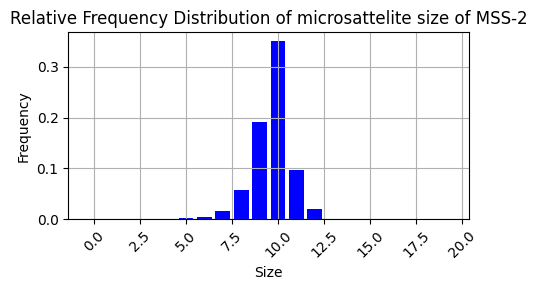

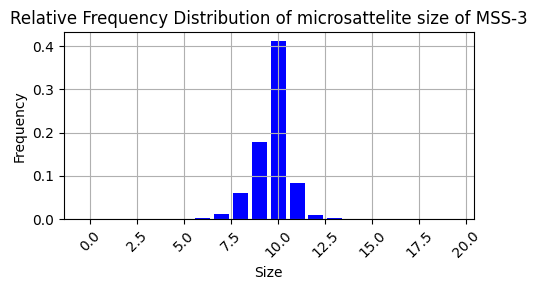

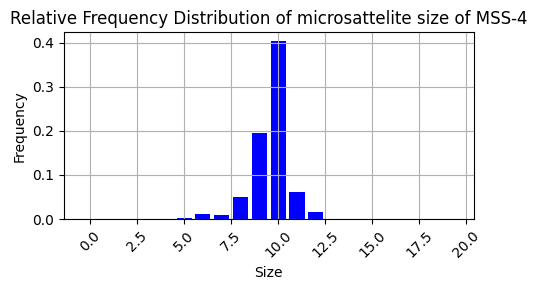

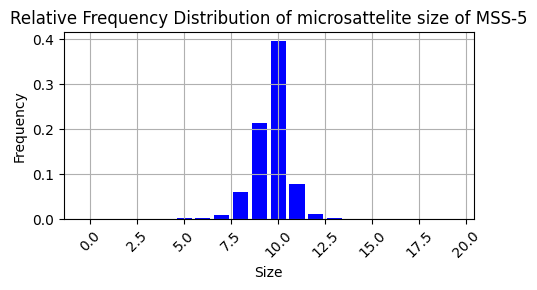

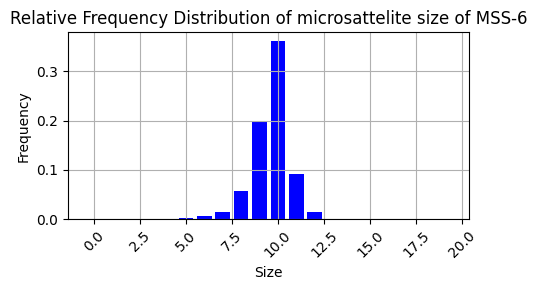

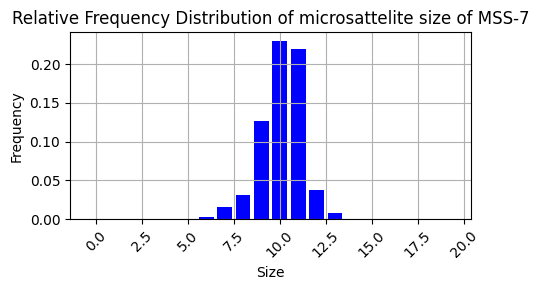

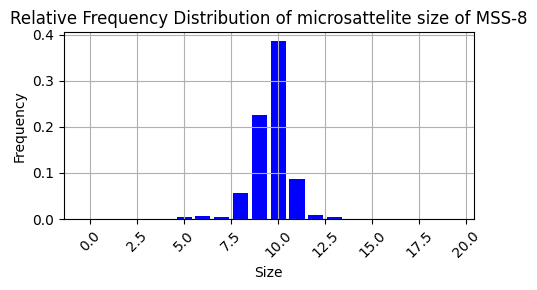

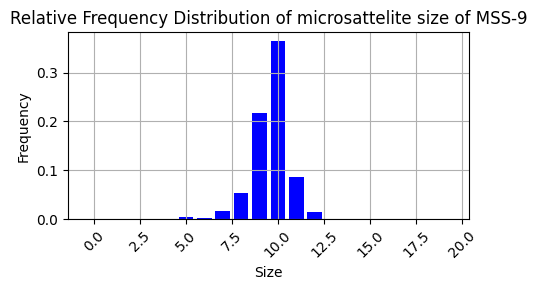

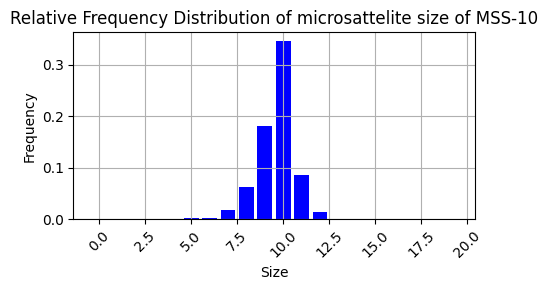

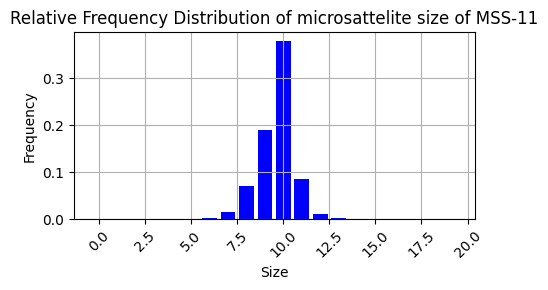

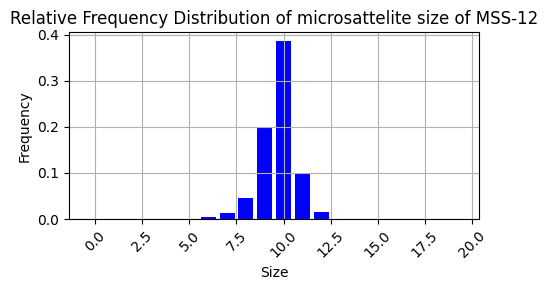

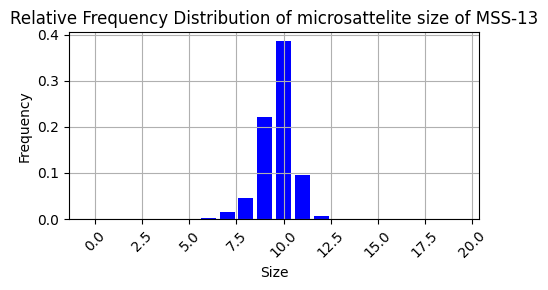

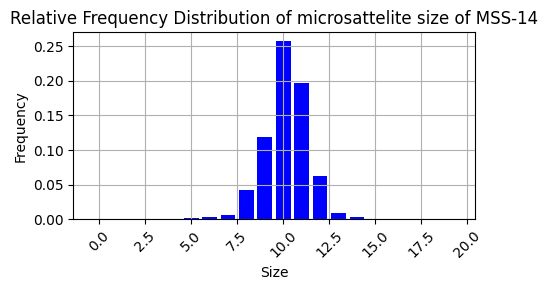

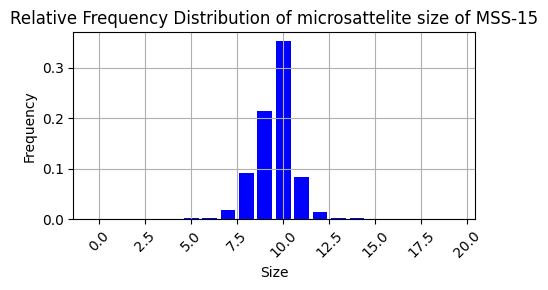

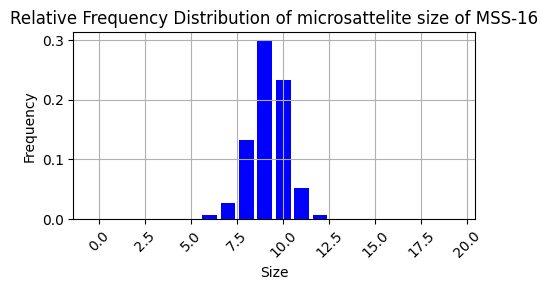

In [223]:
#Visualize relative frequency dist

for col_name in t1.columns:
    if col_name.startswith('MSS'):
        
        frequencies = task1[col_name][1:21]
        
        plt.figure(figsize=(5, 3))
        plt.bar(range(20), frequencies, color=['blue']*20 + ['red']) 
        plt.xlabel('Size')
        plt.ylabel('Frequency')
        plt.title('Relative Frequency Distribution of microsattelite size of ' + col_name)
        plt.xticks(rotation=45) 
        plt.grid(True)
        plt.tight_layout()
        plt.show()



In [135]:
# New working dataframe
t1 = task1.copy()


# Iterate over the column names
for col_name in t1.columns:
    if col_name.startswith('MSI') and not col_name.endswith('Output'):
        # Duplicate the column and insert it after the original one
        t1.insert(t1.columns.get_loc(col_name) + 1, col_name + '_Output', value = None)
 
t1

,Образцы ->,MSI-1,MSI-1_Output,MSI-2,MSI-2_Output,MSI-3,MSI-3_Output,MSI-4,MSI-4_Output,MSI-5,...,MSS-7,MSS-8,MSS-9,MSS-10,MSS-11,MSS-12,MSS-13,MSS-14,MSS-15,MSS-16
0,NaN,STR1,None,NaN,None,NaN,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11(A),0.0004086451144,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12(A),0.00367780603,None,0.000312,None,0.000439,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,21(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
689,22(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,23(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691,24(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
# This is for subsetting and working with partioned data. 

# Initialize variables
start_index = None

# Iterate over the DataFrame
for index, row in t1.iterrows():
    if row['MSI-1'].startswith("STR"):  
        start_index = index + 1
    elif start_index is not None:
        # Process the subset starting from the row after the certain string appears
        # For example, print the rows in the subset
        print("The name of the region : " + t1["MSI-1"][index - 1])
        print(t1.loc[start_index:index+19])
        # Once the subset analysis is done, reset start_index to None to look for the next occurrence of the string
        start_index = None

The name of the region : STR1
   Образцы ->            MSI-1 MSI-1_Output     MSI-2 MSI-2_Output     MSI-3  \
1        9(A)                0         None  0.000000         None  0.000000   
2       10(A)                0         None  0.000000         None  0.000000   
3       11(A)  0.0004086451144         None  0.000000         None  0.000000   
4       12(A)    0.00367780603         None  0.000312         None  0.000439   
5       13(A)    0.03191972394         None  0.001918         None  0.002489   
6       14(A)     0.1352615329         None  0.010881         None  0.013762   
7       15(A)     0.0828641482         None  0.047982         None  0.070310   
8       16(A)    0.06324918271         None  0.099933         None  0.172242   
9       17(A)    0.09553214675         None  0.151260         None  0.200791   
10      18(A)     0.1343080276         None  0.167715         None  0.132128   
11      19(A)      0.171403923         None  0.287670         None  0.230144   
12      20

    Образцы ->           MSI-1 MSI-1_Output     MSI-2 MSI-2_Output     MSI-3  \
484       8(A)               0         None  0.000000         None  0.000000   
485       9(A)               0         None  0.000000         None  0.000000   
486      10(A)               0         None  0.000060         None  0.000075   
487      11(A)  0.000407996736         None  0.000121         None  0.000224   
488      12(A)  0.000560995512         None  0.000724         None  0.002497   
489      13(A)   0.01223990208         None  0.004919         None  0.016886   
490      14(A)   0.05762953896         None  0.021788         None  0.095314   
491      15(A)    0.1778355773         None  0.086520         None  0.282178   
492      16(A)    0.2701958384         None  0.237378         None  0.166325   
493      17(A)    0.2879436965         None  0.424661         None  0.273530   
494      18(A)   0.04013667891         None  0.064822         None  0.034517   
495      19(A)  0.005201958384         N

## TESTS

### KS, chi-squared test,  Wilcoxon rank-sum test, Baysian

In [520]:
#We have a sample with relative frequency distributions. Personally I would prefer working with raw data, for ANOVA analysis, for example.  

#Question - are they different people? Or just different sequencing samples from the same tissue/person etc?

In [593]:
# cols with a specific sample name

# t1[1:21][t1.columns[t1.columns.str.startswith('MSS')]]  #healthy

# t1[1:21][['MSI-1']]   #one sick


healthy = t1[1:21][t1.columns[t1.columns.str.startswith('MSS')]]  #healthy

sick1 = t1[1:21][['MSI-1']]   #one sick
sick2 = t1[1:21][['MSI-12']] 
sick3 = t1[1:21][['MSI-11']]
sick3

,MSI-11
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000094
6,0.000282
7,0.001693
8,0.007197
9,0.039515
10,0.141970


In [216]:
healthy_samples_freqs

,MSS-1,MSS-2,MSS-3,MSS-4,MSS-5,MSS-6,MSS-7,MSS-8,MSS-9,MSS-10,MSS-11,MSS-12,MSS-13,MSS-14,MSS-15,MSS-16
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.001313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000656,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.001152,0.000000,0.003209,0.002147,0.001770,0.000000,0.003636,0.003490,0.002375,0.000000,0.000000,0.000000,0.001630,0.002336,0.000000
7,0.003431,0.003456,0.001970,0.010695,0.003221,0.006637,0.002611,0.007273,0.001994,0.002375,0.002295,0.004216,0.002424,0.002445,0.001168,0.006446
8,0.025729,0.016705,0.011162,0.009626,0.009662,0.013717,0.015666,0.003636,0.017448,0.017815,0.015410,0.013032,0.015758,0.006520,0.018692,0.026591
9,0.065180,0.057604,0.061064,0.050267,0.059045,0.056637,0.031332,0.056364,0.052841,0.062945,0.069836,0.045611,0.046061,0.041565,0.091121,0.132957
10,0.250429,0.190668,0.177938,0.194652,0.213097,0.199115,0.126632,0.225455,0.216849,0.180523,0.190820,0.198927,0.220606,0.118174,0.214953,0.298147


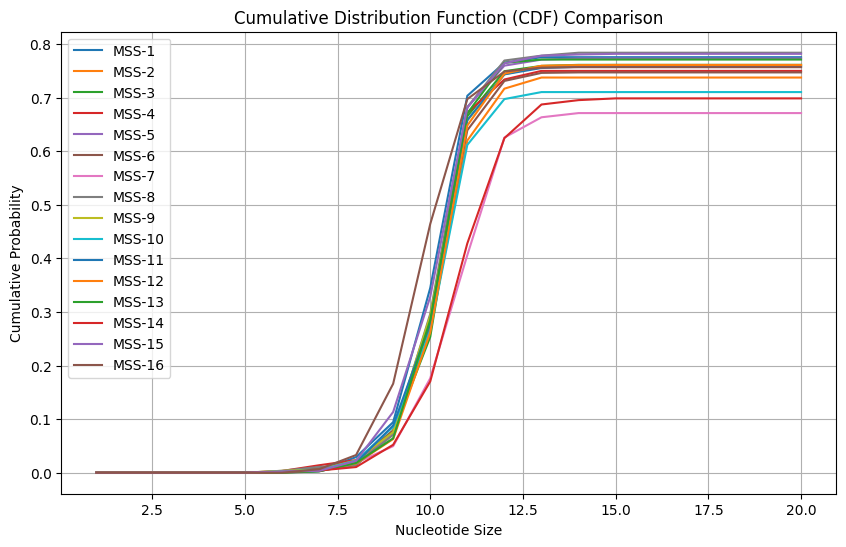

In [250]:
df = t1[1:21][t1.columns[t1.columns.str.startswith('MSS', 'MSI-1')]]

# Calculate Cumulative Distribution
# Calculate the cumulative sum along the rows for each sample
cumulative_distributions = df.cumsum(axis=0)

# Plot Cumulative Distribution
import matplotlib.pyplot as plt

# Plot CDFs for all samples
plt.figure(figsize=(10, 6))
for col in cumulative_distributions.columns:
    plt.plot(cumulative_distributions.index, cumulative_distributions[col], label=col)
plt.xlabel('Nucleotide Size')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) Comparison')
plt.legend()
plt.grid(True)
#plt.show()

In [505]:
overall_relative_frequency

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.23058459e-04, 1.35907803e-03, 3.91610314e-03, 1.48229587e-02,
       6.12768906e-02, 2.01061574e-01, 3.49914653e-01, 9.74980661e-02,
       1.71974506e-02, 2.12646480e-03, 3.00718538e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [506]:
healthy

,MSS-1,MSS-2,MSS-3,MSS-4,MSS-5,MSS-6,MSS-7,MSS-8,MSS-9,MSS-10,MSS-11,MSS-12,MSS-13,MSS-14,MSS-15,MSS-16
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.001313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000656,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.001152,0.000000,0.003209,0.002147,0.001770,0.000000,0.003636,0.003490,0.002375,0.000000,0.000000,0.000000,0.001630,0.002336,0.000000
7,0.003431,0.003456,0.001970,0.010695,0.003221,0.006637,0.002611,0.007273,0.001994,0.002375,0.002295,0.004216,0.002424,0.002445,0.001168,0.006446
8,0.025729,0.016705,0.011162,0.009626,0.009662,0.013717,0.015666,0.003636,0.017448,0.017815,0.015410,0.013032,0.015758,0.006520,0.018692,0.026591
9,0.065180,0.057604,0.061064,0.050267,0.059045,0.056637,0.031332,0.056364,0.052841,0.062945,0.069836,0.045611,0.046061,0.041565,0.091121,0.132957
10,0.250429,0.190668,0.177938,0.194652,0.213097,0.199115,0.126632,0.225455,0.216849,0.180523,0.190820,0.198927,0.220606,0.118174,0.214953,0.298147


In [627]:
# Shapiro-Wilk test for normality


def swt(healthy, sick1):

    # Step 1: Extract relative frequencies of healthy samples and the test sample
    healthy_samples = healthy
    test_sample = sick1

    # Calculate average relative frequency for each size
    overall_relative_frequency = healthy_samples.mean(axis=1).values

    # Make sure they have the same shape
    shape = overall_relative_frequency.shape
    test_sample = test_sample.values.reshape(shape).astype(float)

    # Perform Shapiro-Wilk test for normality
    statistic, p_value = shapiro(test_sample)

    # Print the results
    print("Shapiro-Wilk Test Statistic:", statistic)
    print("P-value:", p_value)
    res_t = str(statistic)
    p_t = str(p_value)

    # Interpret the results
    if p_value < 0.05:
        res1 = "Reject null hypothesis: Data is not normally distributed for the test sample. "
    else:
        res1 = "Cannot reject null hypothesis: Data is normally distributed for the test sample. "

    print("\n")

    statistic, p_value = shapiro(overall_relative_frequency)

    # Print the results
    print("Shapiro-Wilk Test Statistic:", statistic)
    print("P-value:", p_value)
    res_c = str(statistic)
    p_c = str(p_value)

    # Interpret the results
    if p_value < 0.05:
        res2 = "Reject null hypothesis: Data is not normally distributed for the " + "control. "
    else:
        res2 = "Cannot reject null hypothesis: Data is normally distributed for the " + "control. "
        
        
    result_string = " Shapiro-Wilk Test Statistic (test data): " + res_t + ".  " + " P-value: " + p_t + ".  " + res1 + " Shapiro-Wilk Test Statistic (control data): " + res_c + ".  " + " P-value: " + p_c + ".  " + res2
    
    return result_string
        

In [628]:
swt(healthy, sick1)

Shapiro-Wilk Test Statistic: 0.4711351990699768
P-value: 1.7609015401376382e-07


Shapiro-Wilk Test Statistic: 0.41131484508514404
P-value: 5.508389477881792e-08


' Shapiro-Wilk Test Statistic (test data): 0.4711351990699768.   P-value: 1.7609015401376382e-07.  Reject null hypothesis: Data is not normally distributed for the test sample.  Shapiro-Wilk Test Statistic (control data): 0.41131484508514404.   P-value: 5.508389477881792e-08.  Reject null hypothesis: Data is not normally distributed for the control. '

In [618]:
# Kolmogorov-Smirnov test

def KStest(healthy, sick1):

    # Extract relative frequencies of healthy samples and the test sample
    healthy_samples = healthy
    test_sample = sick1

    # Calculate average relative frequency for each size
    overall_relative_frequency = healthy_samples.mean(axis=1).values

    # Make sure they have the same shape
    shape = overall_relative_frequency.shape
    test_sample = test_sample.values.reshape(shape).astype(float)


    # Perform KS Test

    ks_statistic, p_value = ks_2samp(overall_relative_frequency, test_sample, alternative='two-sided', method = 'exact')

    print(f"Kolmogorov-Smirnov Statistic: {ks_statistic}")
    print(f"P-value: {p_value}")

    # Interpret the results
    if p_value < 0.05:
        res1 = "Reject null hypothesis: The distributions are different."
    else:
        res1 = "Cannot reject null hypothesis: The distributions are similar."
        
    result_string = " Kolmogorov-Smirnov Statistic: " + str(ks_statistic) + ".  " + " P-value: " + str(p_value) + ".  " + str(res1)
    
    return result_string

In [881]:
KStest(healthy, sick1)

Kolmogorov-Smirnov Statistic: 0.25
P-value: 0.571336004933722


' Kolmogorov-Smirnov Statistic: 0.25.   P-value: 0.571336004933722.  Cannot reject null hypothesis: The distributions are similar.'

In [554]:
def RFD_barplot(healthy, sick1):
    
    # Step 1: Extract relative frequencies of healthy samples and the test sample
    healthy_samples = healthy
    test_sample = sick1

    # Calculate average relative frequency for each size
    overall_relative_frequency = healthy_samples.mean(axis=1).values

    # Make sure they have the same shape
    shape = overall_relative_frequency.shape
    test_sample = test_sample.values.reshape(shape).astype(float)
    
    # Step 2: Plot them    
    plt.figure(figsize=(5, 3))
    plt.bar(range(20), overall_relative_frequency, edgecolor='blue', color = 'blue', alpha=0.7) 
    plt.bar(range(20), test_sample, edgecolor='red', color = 'red', alpha=0.7) 
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.title( 'Relative Frequency Distribution of microsattelite size')
    plt.xticks(rotation=45)
    
    colors = {'Stable Microsattelites (mean)':'blue', 'Unstable Miscrosattelite':'red'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels, fontsize="5")
    
    
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

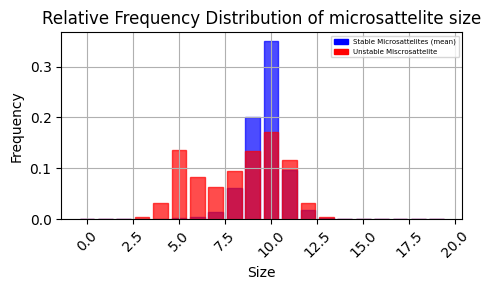

In [555]:
RFD_barplot(healthy, sick1)

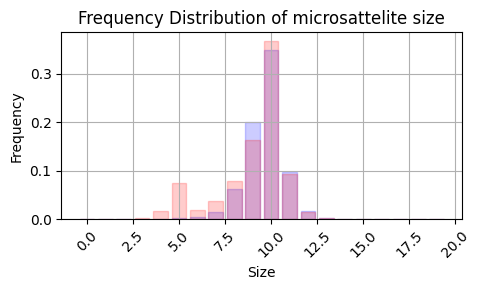

Kolmogorov-Smirnov Test Results:
Kolmogorov-Smirnov Statistic: 0.2
P-value: 0.8319696107963263
Cannot reject null hypothesis: The distributions are similar.


In [404]:
# Kolmogorov-Smirnov test

# Step 1: Extract relative frequencies of healthy samples and the test sample
healthy_samples = healthy
test_sample = sick2

# Calculate average relative frequency for each size
overall_relative_frequency = healthy_samples.mean(axis=1).values

# Make sure they have the same shape
shape = overall_relative_frequency.shape
test_sample = test_sample.values.reshape(shape).astype(float)


# Step 2: Plot them    
plt.figure(figsize=(5, 3))
plt.bar(range(20), overall_relative_frequency, edgecolor=['blue']*20 + ['red'], color = 'blue', alpha=0.2) 
plt.bar(range(20), test_sample, edgecolor=['red'], color = 'red', alpha=0.2) 
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title( 'Frequency Distribution of microsattelite size')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()


# # Step 3: Perform KS Test

ks_statistic, p_value = ks_2samp(overall_relative_frequency, test_sample, alternative='two-sided', method = 'exact')

print("Kolmogorov-Smirnov Test Results:")
print(f"Kolmogorov-Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject null hypothesis: The distributions are different.")
else:
    print("Cannot reject null hypothesis: The distributions are similar.")

In [619]:
# Wilcoxon rank-sum test

def WRStest(healthy, sick1):


    # Step 1: Extract relative frequencies of healthy samples and the test sample
    healthy_samples = healthy
    test_sample = sick1

    # Calculate average relative frequency for each size
    overall_relative_frequency = healthy_samples.mean(axis=1).values

    # Make sure they have the same shape
    shape = overall_relative_frequency.shape
    test_sample = test_sample.values.reshape(shape).astype(float)

    # Convert relative frequencies to counts or ranks
    sample1_counts = overall_relative_frequency * np.sum(overall_relative_frequency)
    sample2_counts = test_sample * np.sum(test_sample)

    # Perform Wilcoxon rank-sum test
    statistic, p_value = mannwhitneyu(sample1_counts, sample2_counts)

#     # Print the results
#     print(" Wilcoxon rank-sum test: ", statistic)
#     print(" P-value: ", p_value)

    # Interpret the results
    if p_value < 0.05:
        r1 = " Reject null hypothesis: The distributions are different. "
    else:
        r1 = "Cannot reject null hypothesis: The distributions are similar. "
    
    result_string = " Wilcoxon rank-sum test: " + str(statistic) + ".  " + "P-value:" +  str(p_value)  + ".  " + r1

    return result_string

In [609]:
WRStest(healthy, sick1)


' Wilcoxon rank-sum test: 158.0 \n P-value:0.248795530336261 \n Cannot reject null hypothesis: The distributions are similar. '

In [407]:
# Wilcoxon rank-sum test

# Step 1: Extract relative frequencies of healthy samples and the test sample
healthy_samples = healthy
test_sample = sick2

# Calculate average relative frequency for each size
overall_relative_frequency = healthy_samples.mean(axis=1).values

# Make sure they have the same shape
shape = overall_relative_frequency.shape
test_sample = test_sample.values.reshape(shape).astype(float)

# Convert relative frequencies to counts or ranks
sample1_counts = overall_relative_frequency * np.sum(overall_relative_frequency)
sample2_counts = test_sample * np.sum(test_sample)

# Perform Wilcoxon rank-sum test
statistic, p_value = mannwhitneyu(sample1_counts, sample2_counts)

# Print the results
print("Wilcoxon rank-sum test:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject null hypothesis: The distributions are different.")
else:
    print("Cannot reject null hypothesis: The distributions are similar.")

Wilcoxon rank-sum test: 162.5
P-value: 0.3062499119843225
Cannot reject null hypothesis: The distributions are similar.


# THEY ARE CLEARLY GIVING ME WRONG RESULTS

# LEARN A MODEL

# Learn 1-class SVM model 

In [475]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [500]:
from sklearn import *

In [793]:
from sklearn.model_selection import GridSearchCV

In [490]:
# Datapoints

healthy.T.values

sick1.T.values

array([['0', '0', '0.0004086451144', '0.00367780603', '0.03191972394',
        '0.1352615329', '0.0828641482', '0.06324918271', '0.09553214675',
        '0.1343080276', '0.171403923', '0.1162822376', '0.03132945877',
        '0.003859426081', '0.0004540501271', '0', '4.54E-05', '0', '0',
        '0']], dtype=object)

In [902]:
def oneClassSVM(healthy):
    # Generate example data
    X = healthy.T.values

    # Bootstrap sampling parameters
    num_samples = 20  # Number of bootstrap samples

    # Hyperparameter grid for One-Class SVM
    param_grid = {'nu': [0.01, 0.05, 0.1, 0.2], 'gamma': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

    # Initialize best F1 score
    best_f1_score = -1

    # Perform bootstrap sampling
    for _ in range(num_samples):
        # Generate bootstrap sample
        X_boot, _ = train_test_split(X, test_size=0.2, random_state=None)

        # Split the data into train and validation sets
        X_train, X_val = train_test_split(X_boot, test_size=0.2, random_state=None)


        # Train One-Class SVM model for each hyperparameter combination
        for nu in param_grid['nu']:
            for gamma in param_grid['gamma']:
                # Train One-Class SVM model
                model = OneClassSVM(kernel='rbf', nu=nu, gamma=gamma)
                model.fit(X_train)

                # Predict labels for validation set
                predictions = model.predict(X_val)

                # Calculate F1 score
                f1 = f1_score(np.ones(len(X_val)), predictions == 1)

                # Check if F1 score is better than the current best
                if f1 > best_f1_score:
                    best_f1_score = f1
                    best_model = model


In [903]:
def OneClassSVM_check(sick1):
    # Predict whether the new data entry is an inlier or an outlier
    prediction = best_model.predict(sick1.T.values)[0]

    if new_data_label == 1:
        print("New data point is classified as an inlier.")
    else:
        print("New data point is classified as an outlier.")

In [897]:
healthy.T.values[[16]]

IndexError: index 16 is out of bounds for axis 0 with size 16

In [759]:
t1[1:21][['MSS-2']]

,MSS-2
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.001152
7,0.003456
8,0.016705
9,0.057604
10,0.190668


In [773]:

OneClassSVM_check(t1[1:21][['MSS-15']])

New data point is classified as an outlier.


In [670]:
sick1.T.values

array([['0', '0', '0.0004086451144', '0.00367780603', '0.03191972394',
        '0.1352615329', '0.0828641482', '0.06324918271', '0.09553214675',
        '0.1343080276', '0.171403923', '0.1162822376', '0.03132945877',
        '0.003859426081', '0.0004540501271', '0', '4.54E-05', '0', '0',
        '0']], dtype=object)

In [956]:
# Train a one-class SVM model (with strange bootstrapping, please ignore)
random.seed(30)

nu_val = [0.001, 0.01, 0.05, 0.1, 0.2]
gamma_val = [1, 10, 25, 50, 100, 500, 1000]

for num in nu_val:
    for gam in gamma_val:
        svm_model = OneClassSVM(kernel='rbf', nu = num, gamma = gam)
        svm_model.fit(healthy.T.values)
        
        print("Nu is " + str(num) + " Gamma is : " + str(gam) )
        
#         for i in range(0,15):
#             prediction = svm_model.predict(healthy.T.values[[i]])
                        
#             if prediction == 1:
#                 print( str(i) + " The new data point is an inlier (normal)")
#             else:
#                 print("The new data point is an outlier (anomaly)")
        
#         print('sick1 not normal')
        prediction = svm_model.predict(sick1.T.values)
   
        if prediction == 1:
            print("The new data point is an inlier (normal)")
        else:
            print("The new data point is an outlier (anomaly)")
        
        print('sick 2 not normal')
        prediction = svm_model.predict(sick2.T.values)
   
        if prediction == 1:
            print("The new data point is an inlier (normal)")
        else:
            print("The new data point is an outlier (anomaly)")
            
        print('sick 3 - normal')
        prediction = svm_model.predict(sick3.T.values)
   
        if prediction == 1:
            print("Sick 3 The new data point is an inlier (normal)")
        else:
            print("The new data point is an outlier (anomaly)")
            
        print('sick 5 - normal')
        prediction = svm_model.predict(sick5.T.values)
   
        if prediction == 1:
            print("Sick 5 The new data point is an inlier (normal)")
        else:
            print("The new data point is an outlier (anomaly)")
                
            #Nu is 0.05 Gamma is : 25 as my test one

Nu is 0.001 Gamma is : 1
The new data point is an outlier (anomaly)
sick 2 not normal
The new data point is an outlier (anomaly)
sick 3 - normal
The new data point is an outlier (anomaly)
sick 5 - normal
The new data point is an outlier (anomaly)
Nu is 0.001 Gamma is : 10
The new data point is an outlier (anomaly)
sick 2 not normal
The new data point is an outlier (anomaly)
sick 3 - normal
The new data point is an outlier (anomaly)
sick 5 - normal
The new data point is an outlier (anomaly)
Nu is 0.001 Gamma is : 25
The new data point is an outlier (anomaly)
sick 2 not normal
The new data point is an outlier (anomaly)
sick 3 - normal
The new data point is an outlier (anomaly)
sick 5 - normal
The new data point is an outlier (anomaly)
Nu is 0.001 Gamma is : 50
The new data point is an outlier (anomaly)
sick 2 not normal
The new data point is an outlier (anomaly)
sick 3 - normal
The new data point is an outlier (anomaly)
sick 5 - normal
The new data point is an outlier (anomaly)
Nu is 0.0

In [963]:
def SVM_one_class(healthy):
    np.random.seed(27)
    
    svm_model = OneClassSVM(kernel='rbf', nu= 0.01, gamma=  25)
    svm_model.fit(healthy.T.values) 


#Nu is 0.01 Gamma is : 25 from my own bootstrapping vals


In [964]:
def SVM_predict(sick1):
    prediction = svm_model.predict(sick1.T.values)
   
    if prediction == 1:
        res1 = "One Class SVM ML. The new data point is an inlier (normal)"
    else:
        res1 = "One Class SVM ML. The new data point is an outlier (anomaly)"
    return res1

# Create a new DataFrame with all tests

In [ ]:
#All functions

oneClassSVM(healthy)
WRStest(healthy, sick1)
swt(healthy, sick1)
KStest(healthy, sick1)
RFD_barplot(healthy, sick1)
OneClassSVM_check(sick1)


In [921]:
#Test 

healthy = t1[1:21][t1.columns[t1.columns.str.startswith('MSS')]]  #healthy
healthy1 = t1[1:21][['MSS-1']]

sick1 = t1[1:21][['MSI-1']]   #one sick
sick2 = t1[1:21][['MSI-12']] 
sick3 = t1[1:21][['MSI-11']]
sick5 = t1[1:21][['MSI-5']]

In [570]:
task1[-20:]

,Образцы ->,MSI-1,MSI-2,MSI-3,MSI-4,MSI-5,MSI-6,MSI-7,MSI-8,MSI-9,...,MSS-7,MSS-8,MSS-9,MSS-10,MSS-11,MSS-12,MSS-13,MSS-14,MSS-15,MSS-16
673,6(A),0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
674,7(A),0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
675,8(A),0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
676,9(A),0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
677,10(A),0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
678,11(A),0.001228501229,0.000000,0.001256,0.000000,0.000604,0.001084,0.000568,0.003262,0.001807,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
679,12(A),0.01523341523,0.002276,0.033676,0.000649,0.001900,0.033612,0.008148,0.051806,0.028414,...,0.000000,0.000000,0.001561,0.000000,0.001110,0.000000,0.000000,0.003899,0.000000,0.000000
680,13(A),0.08734643735,0.014747,0.201142,0.010269,0.021157,0.195090,0.044718,0.251728,0.116531,...,0.004082,0.000000,0.009368,0.005141,0.008044,0.009641,0.009202,0.003899,0.009231,0.002774
681,14(A),0.2992628993,0.085911,0.050228,0.042590,0.126339,0.275170,0.176504,0.100039,0.041636,...,0.046939,0.023077,0.040593,0.030848,0.040499,0.043385,0.052147,0.031189,0.032308,0.030513
682,15(A),0.1514742015,0.312763,0.168265,0.215544,0.387997,0.127014,0.185126,0.082019,0.171717,...,0.183673,0.169231,0.185012,0.118252,0.208599,0.204071,0.225460,0.208577,0.198462,0.213592


In [967]:
# New working dataframe
t1 = task1.copy()


# Iterate over the column names
for col_name in t1.columns:
    if col_name.startswith('MSI') and not col_name.endswith('Output'):
        # Duplicate the column and insert it after the original one
        t1.insert(t1.columns.get_loc(col_name) + 1, col_name + '_Output', value = None)
 
t1

,Образцы ->,MSI-1,MSI-1_Output,MSI-2,MSI-2_Output,MSI-3,MSI-3_Output,MSI-4,MSI-4_Output,MSI-5,...,MSS-7,MSS-8,MSS-9,MSS-10,MSS-11,MSS-12,MSS-13,MSS-14,MSS-15,MSS-16
0,NaN,STR1,None,NaN,None,NaN,None,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11(A),0.0004086451144,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12(A),0.00367780603,None,0.000312,None,0.000439,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,21(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
689,22(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,23(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691,24(A),0,None,0.000000,None,0.000000,None,0.0,None,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [968]:
# This is for subsetting and working with partioned data. 

# Initialize variables
start_index = None

# Iterate over the DataFrame
for index, row in t1.iterrows():
    if row['MSI-1'].startswith("STR"):  
        start_index = index + 1
    elif start_index is not None:
        # Process the subset starting from the row after the certain string appears

        
#         print("The name of the region : " + t1["MSI-1"][index - 1])
        
        healthy = t1[start_index:index+20][t1.columns[t1.columns.str.startswith('MSS')]]  #healthy        
        SVM_one_class(healthy)

        for i, col in enumerate(t1.columns):
            if col.startswith("MSI") and not col.endswith('Output'):
                
                sick1 = t1[start_index:index+20][[col]]
                
                
#                 print(sick1)    
#                 RFD_barplot(healthy, sick1)
#                 swt(healthy, sick1)
#                 WRStest(healthy, sick1)
#                 KStest(healthy, sick1)
#                 oneClassSVM(healthy)
#                 OneClassSVM_check(sick1)


                t1.at[index + 1, t1.columns[i + 1]] = swt(healthy, sick1)
                t1.at[index + 2, t1.columns[i + 1]] = WRStest(healthy, sick1)
                t1.at[index + 3, t1.columns[i + 1]] = KStest(healthy, sick1)
                t1.at[index + 4, t1.columns[i + 1]] = SVM_predict(sick1)
                
                
#         print(t1.loc[start_index:index+19])

    
    
        # Once the subset analysis is done, reset start_index to None to look for the next occurrence of the string
        start_index = None

Shapiro-Wilk Test Statistic: 0.7664135694503784
P-value: 0.0002842066460289061


Shapiro-Wilk Test Statistic: 0.5035164952278137
P-value: 3.420799146169884e-07
Kolmogorov-Smirnov Statistic: 0.25
P-value: 0.571336004933722
Shapiro-Wilk Test Statistic: 0.6373169422149658
P-value: 7.356143214565236e-06


Shapiro-Wilk Test Statistic: 0.5035164952278137
P-value: 3.420799146169884e-07
Kolmogorov-Smirnov Statistic: 0.15
P-value: 0.9831368772656193
Shapiro-Wilk Test Statistic: 0.6469724178314209
P-value: 9.404763659404125e-06


Shapiro-Wilk Test Statistic: 0.5035164952278137
P-value: 3.420799146169884e-07
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.48125308752059937
P-value: 2.16086647242264e-07


Shapiro-Wilk Test Statistic: 0.5035164952278137
P-value: 3.420799146169884e-07
Kolmogorov-Smirnov Statistic: 0.05
P-value: 0.9999999999999998
Shapiro-Wilk Test Statistic: 0.5401793718338013
P-value: 7.501191134906549e-07


Shapiro-Wilk Test Statistic: 

Shapiro-Wilk Test Statistic: 0.43306100368499756
P-value: 8.32803408457039e-08
Kolmogorov-Smirnov Statistic: 0.15
P-value: 0.9831368772656193
Shapiro-Wilk Test Statistic: 0.6514618396759033
P-value: 1.0556650522630662e-05


Shapiro-Wilk Test Statistic: 0.43306100368499756
P-value: 8.32803408457039e-08
Kolmogorov-Smirnov Statistic: 0.15
P-value: 0.9831368772656193
Shapiro-Wilk Test Statistic: 0.43683362007141113
P-value: 8.956376262858612e-08


Shapiro-Wilk Test Statistic: 0.43306100368499756
P-value: 8.32803408457039e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.5303283333778381
P-value: 6.052113121768343e-07


Shapiro-Wilk Test Statistic: 0.43306100368499756
P-value: 8.32803408457039e-08
Kolmogorov-Smirnov Statistic: 0.2
P-value: 0.8319696107963263
Shapiro-Wilk Test Statistic: 0.4939660429954529
P-value: 2.804627854402497e-07


Shapiro-Wilk Test Statistic: 0.4086723327636719
P-value: 5.242053546794523e-08
Kolmogorov-Smirnov Statistic:

Shapiro-Wilk Test Statistic: 0.5293557643890381
P-value: 5.926107746745402e-07


Shapiro-Wilk Test Statistic: 0.436389684677124
P-value: 8.879906232550638e-08
Kolmogorov-Smirnov Statistic: 0.05
P-value: 0.9999999999999998
Shapiro-Wilk Test Statistic: 0.5375349521636963
P-value: 7.079227088979678e-07


Shapiro-Wilk Test Statistic: 0.436389684677124
P-value: 8.879906232550638e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.48249906301498413
P-value: 2.216404766386404e-07


Shapiro-Wilk Test Statistic: 0.436389684677124
P-value: 8.879906232550638e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.557007908821106
P-value: 1.0895493005591561e-06


Shapiro-Wilk Test Statistic: 0.436389684677124
P-value: 8.879906232550638e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.42686760425567627
P-value: 7.395563983436659e-08


Shapiro-Wilk Test Statistic: 0.4

Kolmogorov-Smirnov Statistic: 0.2
P-value: 0.8319696107963263
Shapiro-Wilk Test Statistic: 0.5732419490814209
P-value: 1.5747457382531138e-06


Shapiro-Wilk Test Statistic: 0.5016607046127319
P-value: 3.290688823653909e-07
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.491666316986084
P-value: 2.6746027970148134e-07


Shapiro-Wilk Test Statistic: 0.5016607046127319
P-value: 3.290688823653909e-07
Kolmogorov-Smirnov Statistic: 0.15
P-value: 0.9831368772656193
Shapiro-Wilk Test Statistic: 0.5793913006782532
P-value: 1.8145091189580853e-06


Shapiro-Wilk Test Statistic: 0.5016607046127319
P-value: 3.290688823653909e-07
Kolmogorov-Smirnov Statistic: 0.2
P-value: 0.8319696107963263
Shapiro-Wilk Test Statistic: 0.6903863549232483
P-value: 2.9833980079274625e-05


Shapiro-Wilk Test Statistic: 0.5016607046127319
P-value: 3.290688823653909e-07
Kolmogorov-Smirnov Statistic: 0.25
P-value: 0.571336004933722
Shapiro-Wilk Test Statistic: 0.690885663032531

Shapiro-Wilk Test Statistic: 0.4230179190635681
P-value: 6.872193836215956e-08


Shapiro-Wilk Test Statistic: 0.39876335859298706
P-value: 4.358567906592725e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.4717797040939331
P-value: 1.783875944738611e-07


Shapiro-Wilk Test Statistic: 0.39876335859298706
P-value: 4.358567906592725e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.38890188932418823
P-value: 3.634231404703314e-08


Shapiro-Wilk Test Statistic: 0.39876335859298706
P-value: 4.358567906592725e-08
Kolmogorov-Smirnov Statistic: 0.05
P-value: 0.9999999999999998
Shapiro-Wilk Test Statistic: 0.4647572636604309
P-value: 1.5497057859192864e-07


Shapiro-Wilk Test Statistic: 0.39876335859298706
P-value: 4.358567906592725e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.6509126424789429
P-value: 1.0408029083919246e-05


Shapiro-Wilk Test Stati

Shapiro-Wilk Test Statistic: 0.6940182447433472
P-value: 3.298935553175397e-05


Shapiro-Wilk Test Statistic: 0.5045992732048035
P-value: 3.4992154951396515e-07
Kolmogorov-Smirnov Statistic: 0.15
P-value: 0.9831368772656193
Shapiro-Wilk Test Statistic: 0.5880541205406189
P-value: 2.220160695287632e-06


Shapiro-Wilk Test Statistic: 0.5045992732048035
P-value: 3.4992154951396515e-07
Kolmogorov-Smirnov Statistic: 0.15
P-value: 0.9831368772656193
Shapiro-Wilk Test Statistic: 0.4821763038635254
P-value: 2.201874309548657e-07


Shapiro-Wilk Test Statistic: 0.5045992732048035
P-value: 3.4992154951396515e-07
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.6575870513916016
P-value: 1.237608194060158e-05


Shapiro-Wilk Test Statistic: 0.5045992732048035
P-value: 3.4992154951396515e-07
Kolmogorov-Smirnov Statistic: 0.15
P-value: 0.9831368772656193
Shapiro-Wilk Test Statistic: 0.6819384098052979
P-value: 2.3671353119425476e-05


Shapiro-Wilk Test Stati

Shapiro-Wilk Test Statistic: 0.5369184613227844
P-value: 6.984527658460138e-07


Shapiro-Wilk Test Statistic: 0.4327152371406555
P-value: 8.272823492916359e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.4758753776550293
P-value: 1.9375160320578289e-07


Shapiro-Wilk Test Statistic: 0.4327152371406555
P-value: 8.272823492916359e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.554106593132019
P-value: 1.0210164873569738e-06


Shapiro-Wilk Test Statistic: 0.4327152371406555
P-value: 8.272823492916359e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.42860478162765503
P-value: 7.645420652124812e-08


Shapiro-Wilk Test Statistic: 0.4327152371406555
P-value: 8.272823492916359e-08
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.5407388210296631
P-value: 7.593826012453064e-07


Shapiro-Wilk Test Statistic: 

Shapiro-Wilk Test Statistic: 0.5495642423629761
P-value: 9.227489385921217e-07


Shapiro-Wilk Test Statistic: 0.5554856061935425
P-value: 1.0530002327868715e-06
Kolmogorov-Smirnov Statistic: 0.15
P-value: 0.9831368772656193
Shapiro-Wilk Test Statistic: 0.622763991355896
P-value: 5.115352450957289e-06


Shapiro-Wilk Test Statistic: 0.5554856061935425
P-value: 1.0530002327868715e-06
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.5107361078262329
P-value: 3.9812067598177237e-07


Shapiro-Wilk Test Statistic: 0.5554856061935425
P-value: 1.0530002327868715e-06
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.5325508117675781
P-value: 6.350873604787921e-07


Shapiro-Wilk Test Statistic: 0.5554856061935425
P-value: 1.0530002327868715e-06
Kolmogorov-Smirnov Statistic: 0.1
P-value: 0.9999923931635496
Shapiro-Wilk Test Statistic: 0.557294487953186
P-value: 1.096575942938216e-06


Shapiro-Wilk Test Statistic

Kolmogorov-Smirnov Statistic: 0.2
P-value: 0.8319696107963263
Shapiro-Wilk Test Statistic: 0.5457421541213989
P-value: 8.478395443489717e-07


Shapiro-Wilk Test Statistic: 0.4675278067588806
P-value: 1.6379492251417105e-07
Kolmogorov-Smirnov Statistic: 0.2
P-value: 0.8319696107963263
Shapiro-Wilk Test Statistic: 0.6359586119651794
P-value: 7.108363661245676e-06


Shapiro-Wilk Test Statistic: 0.4675278067588806
P-value: 1.6379492251417105e-07
Kolmogorov-Smirnov Statistic: 0.15
P-value: 0.9831368772656193
Shapiro-Wilk Test Statistic: 0.46047699451446533
P-value: 1.4231358136385097e-07


Shapiro-Wilk Test Statistic: 0.4675278067588806
P-value: 1.6379492251417105e-07
Kolmogorov-Smirnov Statistic: 0.05
P-value: 0.9999999999999998
Shapiro-Wilk Test Statistic: 0.5891742706298828
P-value: 2.279269665450556e-06


Shapiro-Wilk Test Statistic: 0.4675278067588806
P-value: 1.6379492251417105e-07
Kolmogorov-Smirnov Statistic: 0.15
P-value: 0.9831368772656193
Shapiro-Wilk Test Statistic: 0.6233353018

In [969]:
t1.iloc[:21, :17]

,Образцы ->,MSI-1,MSI-1_Output,MSI-2,MSI-2_Output,MSI-3,MSI-3_Output,MSI-4,MSI-4_Output,MSI-5,MSI-5_Output,MSI-6,MSI-6_Output,MSI-7,MSI-7_Output,MSI-8,MSI-8_Output
0,NaN,STR1,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None
1,9(A),0,None,0.000000,None,0.000000,None,0.000000,None,0.000000,None,0.000000,None,0.000000,None,0.000000,None
2,10(A),0,Shapiro-Wilk Test Statistic (test data): 0.76...,0.000000,Shapiro-Wilk Test Statistic (test data): 0.63...,0.000000,Shapiro-Wilk Test Statistic (test data): 0.64...,0.000000,Shapiro-Wilk Test Statistic (test data): 0.48...,0.000000,Shapiro-Wilk Test Statistic (test data): 0.54...,0.000000,Shapiro-Wilk Test Statistic (test data): 0.65...,0.000000,Shapiro-Wilk Test Statistic (test data): 0.65...,0.000000,Shapiro-Wilk Test Statistic (test data): 0.75...
3,11(A),0.0004086451144,Wilcoxon rank-sum test: 158.0. P-value:0.248...,0.000000,Wilcoxon rank-sum test: 177.5. P-value:0.538...,0.000000,Wilcoxon rank-sum test: 182.0. P-value:0.622...,0.000000,Wilcoxon rank-sum test: 193.0. P-value:0.854...,0.000000,Wilcoxon rank-sum test: 198.5. P-value:0.977...,0.000151,Wilcoxon rank-sum test: 174.5. P-value:0.484...,0.000000,Wilcoxon rank-sum test: 178.5. P-value:0.557...,0.000133,Wilcoxon rank-sum test: 156.0. P-value:0.226...
4,12(A),0.00367780603,Kolmogorov-Smirnov Statistic: 0.25. P-value...,0.000312,Kolmogorov-Smirnov Statistic: 0.15. P-value...,0.000439,Kolmogorov-Smirnov Statistic: 0.1. P-value:...,0.000000,Kolmogorov-Smirnov Statistic: 0.05. P-value...,0.000000,Kolmogorov-Smirnov Statistic: 0.05. P-value...,0.000378,Kolmogorov-Smirnov Statistic: 0.15. P-value...,0.000253,Kolmogorov-Smirnov Statistic: 0.15. P-value...,0.003323,Kolmogorov-Smirnov Statistic: 0.25. P-value...
5,13(A),0.03191972394,One Class SVM ML. The new data point is an out...,0.001918,One Class SVM ML. The new data point is an out...,0.002489,One Class SVM ML. The new data point is an out...,0.000095,One Class SVM ML. The new data point is an out...,0.000238,One Class SVM ML. The new data point is an out...,0.002682,One Class SVM ML. The new data point is an out...,0.004179,One Class SVM ML. The new data point is an out...,0.026519,One Class SVM ML. The new data point is an out...
6,14(A),0.1352615329,None,0.010881,None,0.013762,None,0.000851,None,0.002302,None,0.017678,None,0.025412,None,0.101422,None
7,15(A),0.0828641482,None,0.047982,None,0.070310,None,0.003546,None,0.011232,None,0.093828,None,0.083580,None,0.100259,None
8,16(A),0.06324918271,None,0.099933,None,0.172242,None,0.014893,None,0.046515,None,0.222407,None,0.116378,None,0.072478,None
9,17(A),0.09553214675,None,0.151260,None,0.200791,None,0.063496,None,0.149349,None,0.159968,None,0.111862,None,0.099196,None


# Save File

In [971]:
t1.to_csv('results.tsv', index=False)